In [44]:
import pandas as pd
from src.data_cleansing import load_codified_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import numpy as np

First we load 

In [54]:
data=load_codified_data("train")
X=data.drop(columns="price")
y=data["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3000,train_size=0.8)

First we analyze the perfomance of the model with raw data after data cleansing

In [5]:
rfr=RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train,y_train)
y_predict=rfr.predict(X_test)
print(f"RMSE={mean_squared_error(y_test,y_predict)**0.5}")

RMSE=549.6997439888894


Now we are going to optimize the hyperparameters of the model

In [17]:

params={"n_estimators":[150,200,300],
        "max_depth":[25,50,100],
        "min_samples_split":[5,10,20]
       }
GSCV=GridSearchCV(estimator=RandomForestRegressor(n_estimators=200,max_depth=50,min_samples_split=10,min_samples_leaf=1,random_state=300),
             scoring="neg_root_mean_squared_error",verbose=1,n_jobs=-1,param_grid=params,cv=5)

In [ ]:
GSCV.fit(X_train,y_train)

In [21]:
GSCV.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=50,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=10,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=200, n_jobs=None,
                                             oob_score=False, random_state=300,
                                             verbose=0, warm_start=Fal

In [46]:
y_test_predicted=GSCV.predict(X_test)

RMSE=mean_squared_error(y_test,y_test_predicted)**0.5

R2=r2_score(y_test,y_test_predicted)

print(f"R2={R2}, RMSE={RMSE}")

R2=0.9807529736307129, RMSE=546.2159191740324


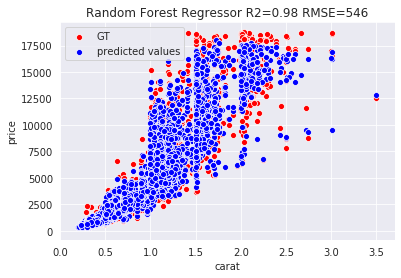

In [51]:
sns.set_style('darkgrid', {'legend.frameon':True})

fig=sns.scatterplot(x=X_test.carat,y=y_test,color="red",label="GT")
fig.set_title("Random Forest Regressor R2=0.98 RMSE=546")
sns.scatterplot(x=X_test.carat,y=y_test_predicted,color="blue",label="predicted values")

In [53]:
fig.get_figure().savefig("output/RFR_prediction.png",transparent=True)

We are going to train a new model with optimized parameters with the whole dataset and make our prediction

In [58]:
rfr_optimized=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=50,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=10,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=200, n_jobs=None,
                                             oob_score=False, random_state=300,
                                             verbose=0, warm_start=False)

In [59]:
rfr_optimized.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=300, verbose=0, warm_start=False)

In [64]:
test_data=load_codified_data("test")

In [65]:
y_predicted_test_data=rfr_optimized.predict(test_data)

In [66]:
pd.DataFrame(y_predicted_test_data,columns=["price"]).to_csv("output/RFR_optimized",index_label="id")

This submission gives a R2 of 537.75563 in the competition